# Mishin Al 1999 rebuild testing

Package import notes:

- potentials contains tools for managing LAMMPS-implemented potentials, such as building EAM parameter files and generating LAMMPS command lines.

- atomman is used here to load an fcc cell and run a simple LAMMPS script.

NOTE: I fixed a bug in potentials where the parameter file builder was tabulating phi(r) instead of r\*phi(r).  This bug is still present in the official released version 0.3.3 of potentials but the next version will be fixed.

In [1]:
# https://github.com/usnistgov/potentials
import potentials

# https://github.com/usnistgov/atomman
import atomman as am

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

## Load the old LAMMPS implementation and initialize a new builder.

Notes:
- rho values set to exactly reproduce the F_al.plt table.  Increasing numrho increases the observed fluctuations in F(rho).
- No r values can exactly reproduce the other tables as they start at r=1.0 and 1.0 is not evenly divisible by deltar.  
- The r cutoff has a low-precision value in fal.plt and a higher precision value in pal_m.plt

In [70]:
old = potentials.paramfile.EAMAlloy(f='Al99.eam.alloy')

new = potentials.paramfile.EAMAlloy(symbol = 'Al', number = 13, mass = 26.982, alat = 4.05, lattice = 'fcc',
                                    numrho = 2001, cutoffrho = 2.0,
                                    numr = 10000,
                                    #cutoffr = 6.28721,
                                    cutoffr = 6.28720999739081,
                                    )

new_file_name = 'Al99_rebuild_test.eam.alloy'

## Set functions using tabulated values

In [71]:
# Read F_al.plt using pandas
df = pd.read_csv('F_al.plt', sep =' ', skiprows=6, names=['rho', 'F_rho'], skipinitialspace=True)

# Add F(0.0) = 0.0
rho = np.array([0.0] + df.rho.tolist())
F_rho = np.array([0.0] + df.F_rho.tolist())

# Set F(rho)
new.set_F_rho('Al', table=F_rho, rho=rho)

In [82]:
from scipy.interpolate import CubicSpline

In [89]:
rho = [0.0, 0.3, 0.6, 1.0, 1.2, 1.4, 2.0]
F_rho = [0.0, -1.9254867600, -2.4433663200, -2.7147949500, -2.6851018500, -2.6930236900, -2.0756258900]
F_rho = CubicSpline(rho, F_rho, )#bc_type='natural')

In [87]:
F_rho(rho)

array([ 0.        , -1.92548676, -2.44336632, -2.71479495, -2.68510185,
       -2.69302369, -2.07562589])

In [72]:
# Read pal_m.plt using pandas
df = pd.read_csv('pal_m.plt', sep =' ', names=['r', 'phi_r'], skipinitialspace=True, index_col=False)

# Set phi(r)
new.set_phi_r('Al', table=df.phi_r, r=df.r)

# Save high-precision r values for use with rho(r)
r1 = df.r

In [73]:
# Read fal.plt using pandas
df = pd.read_csv('fal.plt', sep =' ', skiprows=6, names=['r', 'rho_r'], skipinitialspace=True)

# Add 0.0 point to reproduce Al99.eam.alloy r < 1.0 extrapolation.  High-precision r values used
r = np.array([0.0] + r1.tolist())
rho_r = np.array([0.2785894267518672E+00] + df.rho_r.tolist())

# Set rho(r)
new.set_rho_r('Al', table=rho_r, r=r)

In [74]:
# Build parameter file and read it back in to ensure plotted functions are based on the saved tabulations
new.build(f=new_file_name, ncolumns=1)
new = potentials.paramfile.EAMAlloy(f=new_file_name)

## F(rho) and derivatives

(-3.0, 0.0)

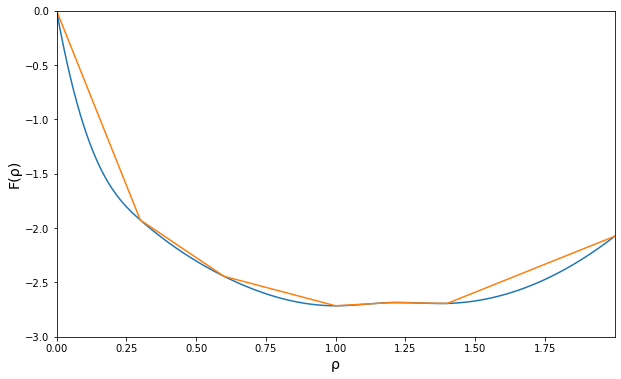

In [90]:
fig, ax = plt.subplots(figsize=(10, 6))
old.plot_F_rho(symbols='Al', matplotlib_axes=ax)
ax.plot(rho, F_rho(rho))
#new.plot_F_rho(matplotlib_axes=ax)
plt.ylim([-3.0, 0.0])

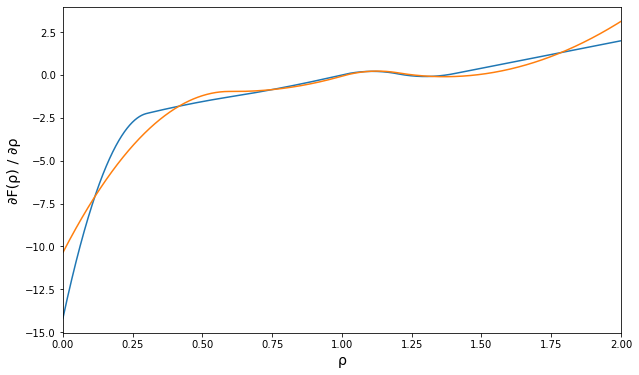

In [80]:
fig, ax = plt.subplots(figsize=(10, 6))
old.plot_F_rho(n=1, symbols='Al', matplotlib_axes=ax)
new.plot_F_rho(n=1, matplotlib_axes=ax)

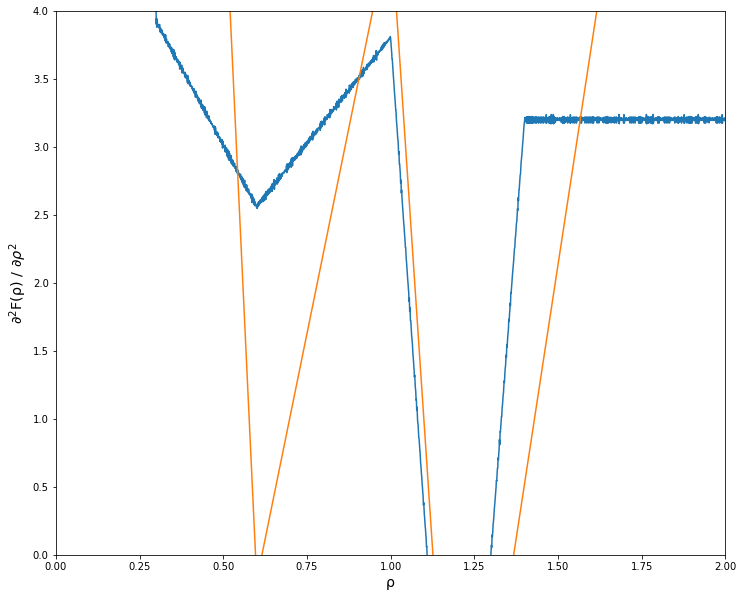

In [81]:
fig, ax = plt.subplots(figsize=(12, 10))
old.plot_F_rho(n=2, symbols='Al', matplotlib_axes=ax, ylim=(-0, 4))
new.plot_F_rho(n=2, matplotlib_axes=ax, ylim=(-0, 4))

(-300.0, 100.0)

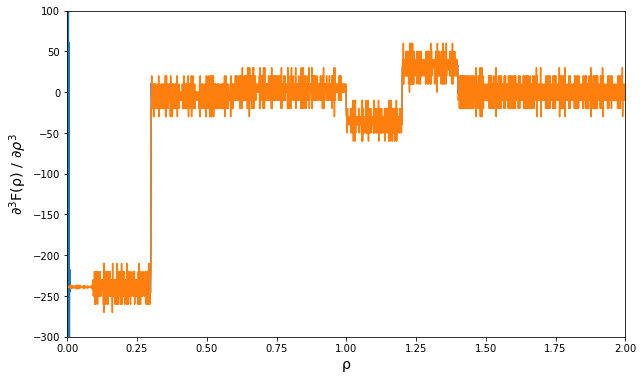

In [57]:
fig, ax = plt.subplots(figsize=(10, 6))
old.plot_F_rho(n=3, symbols='Al', matplotlib_axes=ax)
new.plot_F_rho(n=3, matplotlib_axes=ax)
plt.ylim(-300, 100)

## rho(r) and derivatives

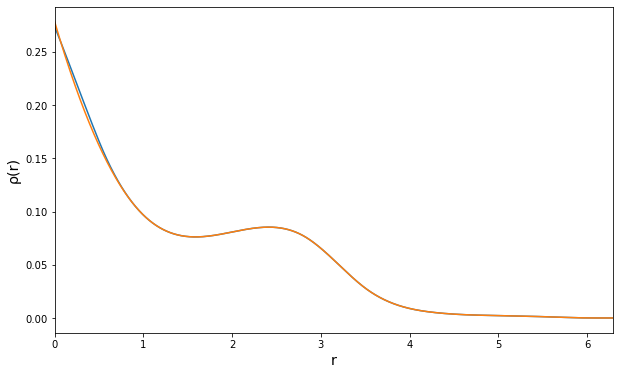

In [58]:
fig, ax = plt.subplots(figsize=(10, 6))
old.plot_rho_r(symbols='Al', matplotlib_axes=ax)
new.plot_rho_r(matplotlib_axes=ax)

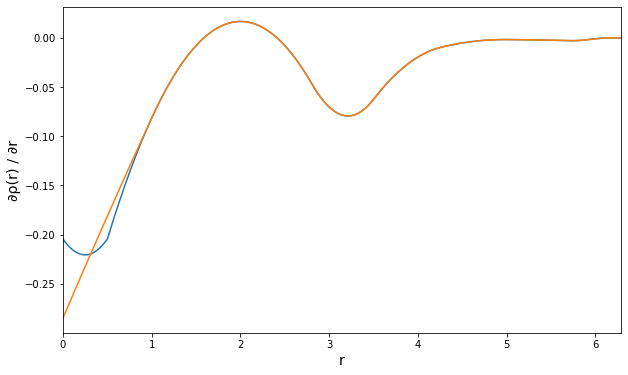

In [59]:
fig, ax = plt.subplots(figsize=(10, 6))
old.plot_rho_r(n=1, symbols='Al', matplotlib_axes=ax)
new.plot_rho_r(n=1, matplotlib_axes=ax)

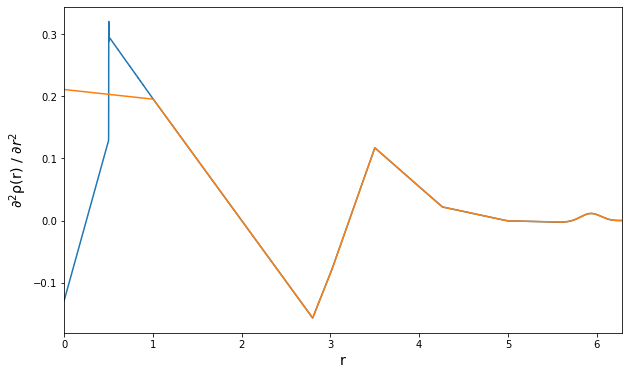

In [60]:
fig, ax = plt.subplots(figsize=(10, 6))
old.plot_rho_r(n=2, symbols='Al', matplotlib_axes=ax)
new.plot_rho_r(n=2, matplotlib_axes=ax)

(-1.0, 1.0)

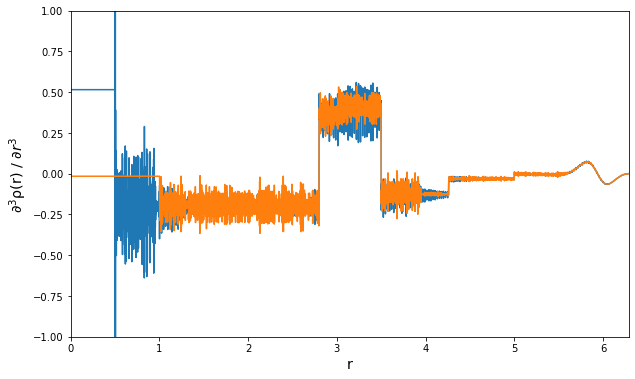

In [63]:
fig, ax = plt.subplots(figsize=(10, 6))
old.plot_rho_r(n=3, symbols='Al', matplotlib_axes=ax)
new.plot_rho_r(n=3, matplotlib_axes=ax)
plt.ylim(-1, 1)

## r\*phi(r) and derivatives

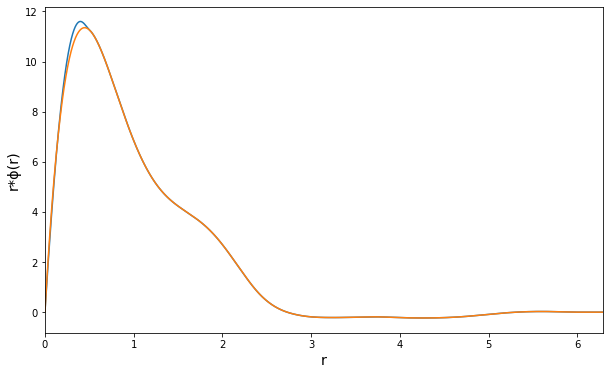

In [64]:
fig, ax = plt.subplots(figsize=(10, 6))
old.plot_rphi_r(symbols='Al', matplotlib_axes=ax)
new.plot_rphi_r(matplotlib_axes=ax)

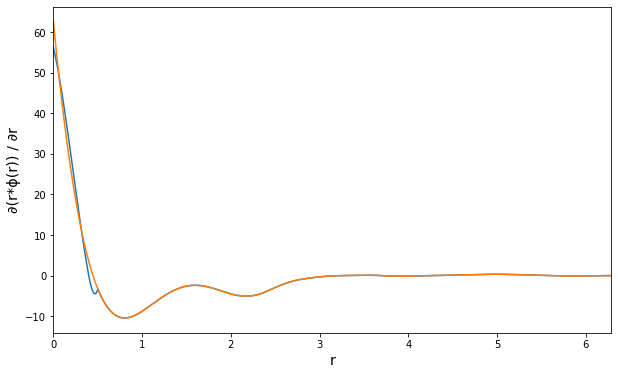

In [65]:
fig, ax = plt.subplots(figsize=(10, 6))
old.plot_rphi_r(n=1, symbols='Al', matplotlib_axes=ax)
new.plot_rphi_r(n=1, matplotlib_axes=ax)

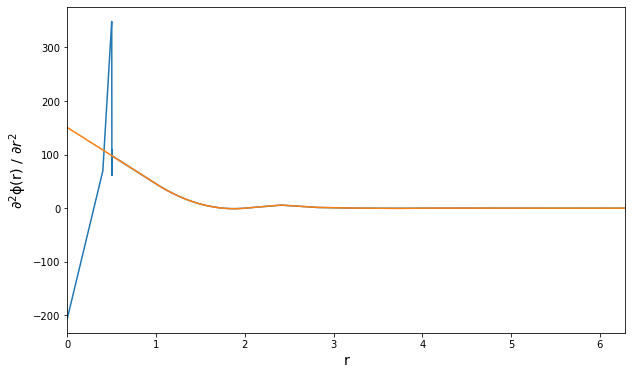

In [68]:
fig, ax = plt.subplots(figsize=(10, 6))
old.plot_phi_r(n=2, symbols='Al', matplotlib_axes=ax)
new.plot_phi_r(n=2, matplotlib_axes=ax)

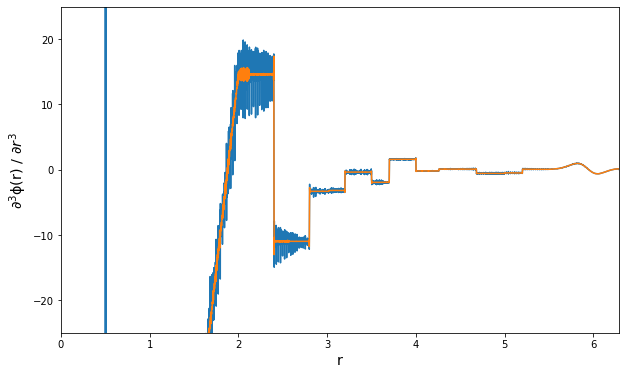

In [69]:
fig, ax = plt.subplots(figsize=(10, 6))
old.plot_phi_r(n=3, symbols='Al', matplotlib_axes=ax, ylim=(-25, 25))
new.plot_phi_r(n=3, matplotlib_axes=ax, ylim=(-25, 25))

## FCC energy check

In [19]:
# Build LAMMPS potential models for the new and old files
newpot = potentials.build_lammps_potential('eam/alloy', paramfile=new_file_name,
                                           elements=['Al']).potential()
oldpot = potentials.build_lammps_potential('eam/alloy', paramfile='Al99.eam.alloy',
                                           elements=['Al']).potential()

In [20]:
# LAMMPS template script
template = """
#LAMMPS input script that evaluates a system's energy and pressure without relaxing

box tilt large

<atomman_system_pair_info>

variable peatom equal pe/atoms

thermo_style custom step lx ly lz pxx pyy pzz pe v_peatom
thermo_modify format float %.15e

minimize 0.0 1.0e-8 10000 100000
"""

### a = 4.045

In [21]:
ucell = am.load('prototype', 'A1--Cu--fcc', a=4.045, symbols='Al')

info = {'atomman_system_pair_info': ucell.dump('atom_data', f='test.dat', potential=oldpot)}

script = am.tools.filltemplate(template, info, '<', '>')
log = am.lammps.run('lmp_mpi', script=script)
print('old:')
print(log.simulations[0].thermo.PotEng.values[-1])
print(log.simulations[0].thermo.v_peatom.values[-1])


info = {'atomman_system_pair_info': ucell.dump('atom_data', f='test.dat', potential=newpot)}

script = am.tools.filltemplate(template, info, '<', '>')
log = am.lammps.run('lmp_mpi', script=script)
print('new:')
print(log.simulations[0].thermo.PotEng.values[-1])
print(log.simulations[0].thermo.v_peatom.values[-1])

old:
-13.43977531740979
-3.359943829352448
new:
-13.43977567058024
-3.35994391764506


### a = 4.05

In [22]:
ucell = am.load('prototype', 'A1--Cu--fcc', a=4.05, symbols='Al')

info = {'atomman_system_pair_info': ucell.dump('atom_data', f='test.dat', potential=oldpot)}

script = am.tools.filltemplate(template, info, '<', '>')
log = am.lammps.run('lmp_mpi', script=script)
print('old:')
print(log.simulations[0].thermo.PotEng.values[-1])
print(log.simulations[0].thermo.v_peatom.values[-1])


info = {'atomman_system_pair_info': ucell.dump('atom_data', f='test.dat', potential=newpot)}

script = am.tools.filltemplate(template, info, '<', '>')
log = am.lammps.run('lmp_mpi', script=script)
print('new:')
print(log.simulations[0].thermo.PotEng.values[-1])
print(log.simulations[0].thermo.v_peatom.values[-1])

old:
-13.43999995253993
-3.359999988134983
new:
-13.43999995302535
-3.359999988256338


### a = 4.055

In [23]:
ucell = am.load('prototype', 'A1--Cu--fcc', a=4.055, symbols='Al')

info = {'atomman_system_pair_info': ucell.dump('atom_data', f='test.dat', potential=oldpot)}

script = am.tools.filltemplate(template, info, '<', '>')
log = am.lammps.run('lmp_mpi', script=script)
print('old:')
print(log.simulations[0].thermo.PotEng.values[-1])
print(log.simulations[0].thermo.v_peatom.values[-1])


info = {'atomman_system_pair_info': ucell.dump('atom_data', f='test.dat', potential=newpot)}

script = am.tools.filltemplate(template, info, '<', '>')
log = am.lammps.run('lmp_mpi', script=script)
print('new:')
print(log.simulations[0].thermo.PotEng.values[-1])
print(log.simulations[0].thermo.v_peatom.values[-1])

old:
-13.43977617430978
-3.359944043577446
new:
-13.43977581236684
-3.35994395309171


### Bulk scan

In [24]:
avals = np.linspace(4.04, 4.06, 51)
avals

array([4.04  , 4.0404, 4.0408, 4.0412, 4.0416, 4.042 , 4.0424, 4.0428,
       4.0432, 4.0436, 4.044 , 4.0444, 4.0448, 4.0452, 4.0456, 4.046 ,
       4.0464, 4.0468, 4.0472, 4.0476, 4.048 , 4.0484, 4.0488, 4.0492,
       4.0496, 4.05  , 4.0504, 4.0508, 4.0512, 4.0516, 4.052 , 4.0524,
       4.0528, 4.0532, 4.0536, 4.054 , 4.0544, 4.0548, 4.0552, 4.0556,
       4.056 , 4.0564, 4.0568, 4.0572, 4.0576, 4.058 , 4.0584, 4.0588,
       4.0592, 4.0596, 4.06  ])

In [25]:
old_e = []
new_e = []
for aval in avals:
    ucell = am.load('prototype', 'A1--Cu--fcc', a=aval, symbols='Al')
    info = {'atomman_system_pair_info': ucell.dump('atom_data', f='test.dat', potential=oldpot)}
    script = am.tools.filltemplate(template, info, '<', '>')
    log = am.lammps.run('lmp_mpi', script=script)
    old_e.append(log.simulations[0].thermo.PotEng.values[-1])
    
    info = {'atomman_system_pair_info': ucell.dump('atom_data', f='test.dat', potential=newpot)}
    script = am.tools.filltemplate(template, info, '<', '>')
    log = am.lammps.run('lmp_mpi', script=script)
    new_e.append(log.simulations[0].thermo.PotEng.values[-1])

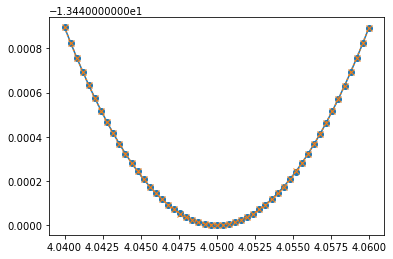

In [26]:
plt.plot(avals, old_e, 'o-')
plt.plot(avals, new_e, 'x:')

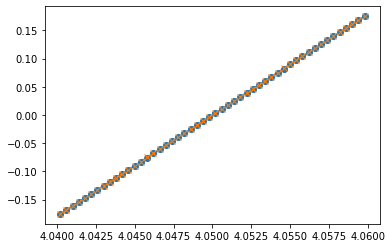

In [27]:
avals1, old_e1 = potentials.tools.numderivative(avals, old_e)
avals1, new_e1 = potentials.tools.numderivative(avals, new_e)

plt.plot(avals1, old_e1, 'o-')
plt.plot(avals1, new_e1, 'x:')

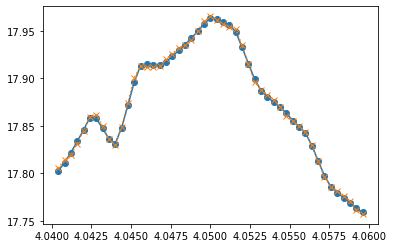

In [28]:
avals2, old_e2 = potentials.tools.numderivative(avals1, old_e1)
avals2, new_e2 = potentials.tools.numderivative(avals1, new_e1)

plt.plot(avals2, old_e2, 'o-')
plt.plot(avals2, new_e2, 'x:')